# 1. importing libraries

In [42]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt 

# 2. reading csv 

In [43]:
df=pd.read_csv('./train.csv')
df['Date']=pd.to_datetime(df['Date'])
df.sort_values(by=['Date'],inplace=True,ascending=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


# 3. checking for null values

In [44]:
df.isnull().sum()
#test am i here

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# 4. outlier analysis

<AxesSubplot:>

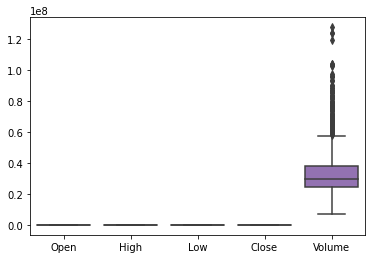

In [45]:
sns.boxplot(data=df)
#sns.boxplot(data=df['Open'])



#volume has outliers

<AxesSubplot:>

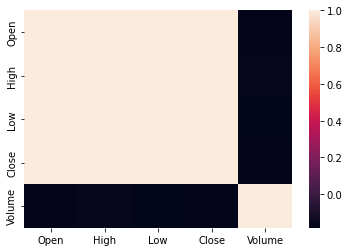

In [46]:
corr=df.corr()
sns.heatmap(corr)

In [47]:
print(df['Volume'].max()-df['Volume'].min())

120388600


the attribute volume has outliers, hence it will be dropped

<AxesSubplot:>

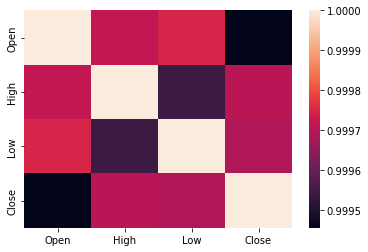

In [48]:
check=df.drop(['Volume'],axis=1)
corr=check.corr()
sns.heatmap(corr)

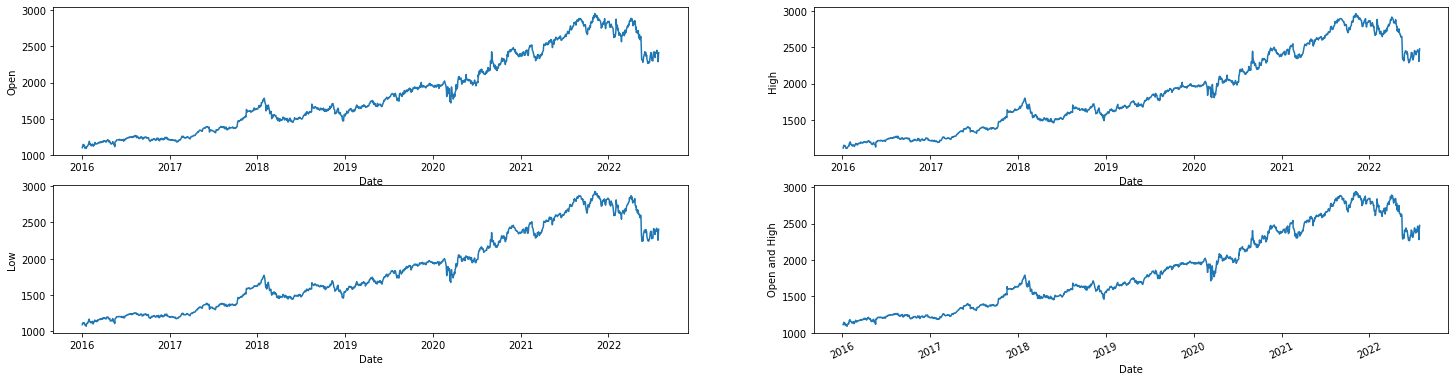

In [49]:
#close is target variable
fig,ax =  plt.subplots( 2,2,figsize = ( 25, 6))
sns.lineplot(ax=ax[0][0],x = "Date", y = "Open", data = df)
sns.lineplot(ax=ax[0][1],x = "Date", y = "High", data = df)
sns.lineplot(ax=ax[1][0],x = "Date", y = "Low", data = df)
sns.lineplot(ax=ax[1][1],x = "Date", y = "Close", data = df)
#sns.lineplot(x = "Date", y = "Volume", data = df)
plt.ylabel("Open and High")
plt.xticks(rotation = 25)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Volume'>

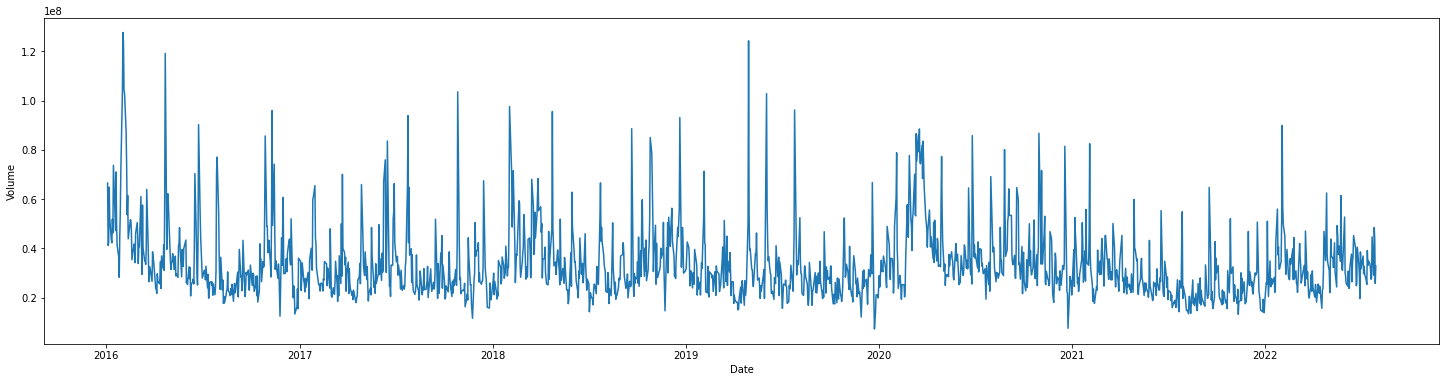

In [50]:
plt.figure(figsize=(25,6))
sns.lineplot(x='Date',y='Volume',data=df)

#most time series decisions to be taken on volume data


In [51]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [52]:
df.rename(columns={'Close':'y','Date':'ds'},inplace=True)
df.head()

,ds,Open,High,Low,y,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [53]:

import prophet as pr
model= pr.Prophet()
model.add_regressor('Open',standardize=False)

model.add_regressor('High',standardize=False)
model.add_regressor('Low',standardize=False)

model.add_regressor('Volume',standardize=False)
model.make_all_seasonality_features(df)
model.fit(df)

c:\Users\Bhavini\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:11 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
df_test=df
df_test.head()

,ds,Open,High,Low,y,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [55]:
forecast=model.predict(df_test)

In [56]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,High,High_lower,High_upper,Low,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,1250.030961,1094.467009,1114.973874,1250.030961,1250.030961,904.134378,904.134378,904.134378,938.680163,...,-1248.181163,-1248.181163,-1248.181163,0.041775,0.041775,0.041775,0.0,0.0,0.0,1104.606046
1,2016-01-05,1250.027559,1114.871023,1135.094540,1250.027559,1250.027559,920.267570,920.267570,920.267570,954.899073,...,-1248.650893,-1248.650893,-1248.650893,0.022816,0.022816,0.022816,0.0,0.0,0.0,1124.795048
2,2016-01-06,1250.024157,1123.417756,1144.434391,1250.024157,1250.024157,926.868992,926.868992,926.868992,957.773854,...,-1249.291024,-1249.291024,-1249.291024,0.005708,0.005708,0.005708,0.0,0.0,0.0,1134.160286
3,2016-01-07,1250.020754,1130.400903,1151.452438,1250.020754,1250.020754,935.887952,935.887952,935.887952,959.026743,...,-1248.336427,-1248.336427,-1248.336427,-0.009104,-0.009104,-0.009104,0.0,0.0,0.0,1141.447696
4,2016-01-08,1250.017352,1119.377448,1139.873534,1250.017352,1250.017352,936.050749,936.050749,936.050749,961.918686,...,-1247.355127,-1247.355127,-1247.355127,-0.021118,-0.021118,-0.021118,0.0,0.0,0.0,1129.752349


In [57]:
forecast=forecast[['ds','yhat']]

In [58]:
forecast.head()

,ds,yhat
0,2016-01-04,1104.606046
1,2016-01-05,1124.795048
2,2016-01-06,1134.160286
3,2016-01-07,1141.447696
4,2016-01-08,1129.752349


In [59]:
final_df=pd.concat((forecast['yhat'],df),axis=1)

In [60]:
final_df.head()

,yhat,ds,Open,High,Low,y,Volume
0,1104.606046,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,1124.795048,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,1134.160286,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,1141.447696,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,1129.752349,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


<AxesSubplot:xlabel='ds', ylabel='y'>

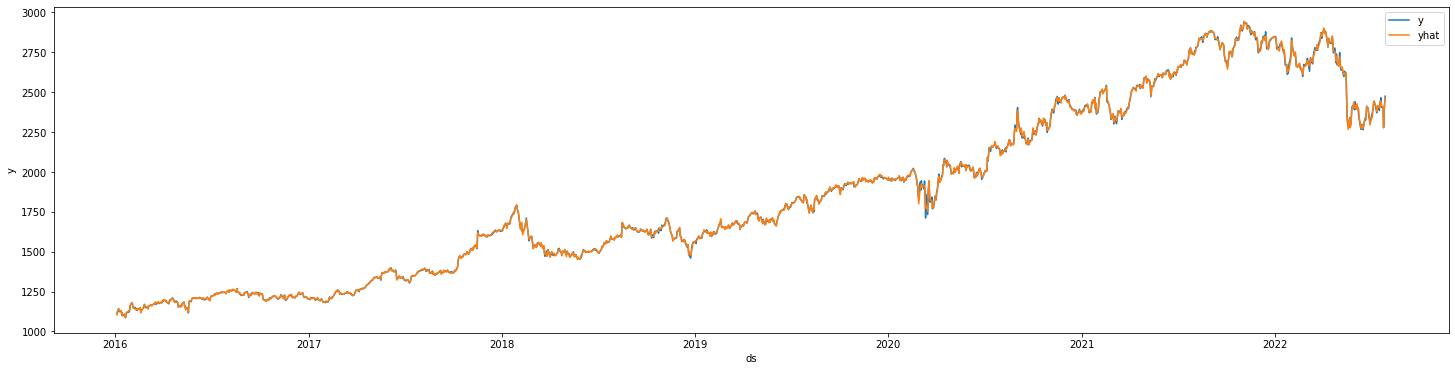

In [61]:
from cProfile import label


plt.figure(figsize=(25,6))
sns.lineplot(x = "ds", y = "y", data = final_df,label='y')
sns.lineplot(x = "ds", y = "yhat", data = final_df,label='yhat')

In [62]:
df_final=pd.read_csv('./test.csv')
df_final['Date']=pd.to_datetime(df_final['Date'])
df_final.sort_values(by=['Date'],inplace=True,ascending=True)
df_final.head()

,Date,Open,High,Low,Volume
0,2022-08-01,2455.71,2500.26,2447.87,24327600
1,2022-08-02,2466.68,2494.73,2447.99,19076300
2,2022-08-03,2473.29,2507.59,2449.39,27459700
3,2022-08-04,2475.98,2487.75,2419.88,23699600
4,2022-08-05,2414.66,2444.17,2409.01,18912400


In [63]:
df_final.rename(columns={'Close':'y','Date':'ds'},inplace=True)
forcast=model.predict(df_final)

In [64]:
forcast=forcast[['ds','yhat']]

In [65]:
final=pd.concat((forcast['yhat'],df_final),axis=1)

In [66]:
final.head()

,yhat,ds,Open,High,Low,Volume
0,2487.362953,2022-08-01,2455.71,2500.26,2447.87,24327600
1,2475.149131,2022-08-02,2466.68,2494.73,2447.99,19076300
2,2481.561802,2022-08-03,2473.29,2507.59,2449.39,27459700
3,2439.215735,2022-08-04,2475.98,2487.75,2419.88,23699600
4,2436.599786,2022-08-05,2414.66,2444.17,2409.01,18912400


In [67]:
ans=final[['ds','yhat']]

In [68]:
ans.head()

,ds,yhat
0,2022-08-01,2487.362953
1,2022-08-02,2475.149131
2,2022-08-03,2481.561802
3,2022-08-04,2439.215735
4,2022-08-05,2436.599786


In [69]:
ans.rename(columns={'yhat':'Close','ds':'Date'},inplace=True)

C:\Users\Bhavini\AppData\Local\Temp\ipykernel_16920\54970886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans.rename(columns={'yhat':'Close','ds':'Date'},inplace=True)


In [70]:
ans.head()

,Date,Close
0,2022-08-01,2487.362953
1,2022-08-02,2475.149131
2,2022-08-03,2481.561802
3,2022-08-04,2439.215735
4,2022-08-05,2436.599786


In [71]:
ans.to_csv('./ans.csv',index=False)

using sktime


In [72]:
print(df.columns)
df.dtypes

Index(['ds', 'Open', 'High', 'Low', 'y', 'Volume'], dtype='object')


ds        datetime64[ns]
Open             float64
High             float64
Low              float64
y                float64
Volume             int64
dtype: object

In [73]:
import sktime as skt
# dickey fuller test for determining if data is stationary
from statsmodels.tsa.stattools import adfuller
df_test=df['Open']
# df_test.dtypes
result = adfuller(df_test)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.111620
p-value: 0.710416
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [74]:
from sktime.forecasting.sarimax import SARIMAX
forecast=SARIMAX(order=(1,0,0),seasonal_order=())

In [87]:
import pmdarima as pm 
sxmodel = pm.auto_arima(df[['Close']], exogenous=df[['Volume']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


KeyError: "None of [Index(['Close'], dtype='object')] are in the [columns]"

In [ ]:
sxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1655
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -7649.821
Date:                            Sat, 15 Oct 2022   AIC                          15313.642
Time:                                    17:58:20   BIC                          15351.472
Sample:                                         0   HQIC                         15327.671
                                           - 1655                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9593      0.651      1.473      0.141      -0.317       2.236
ar.L1          0.9029      0.013     71.955      0.000       0.878       0.928
ar.L2          0.1014      0.018      5.609      0.000       0.066       0.137
ar.L3         -0.0567      0.015     -3.874      0.000      -0.085      -0.028
ar.S.L12      -0.6322      0.016    -40.144      0.000      -0.663      -0.601
ar.S.L24      -0.2973      0.019    -15.435      0.000      -0.335      -0.260
sigma2       645.2755     10.774     59.894      0.000     624.160     666.391
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3430.02
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.12   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
fitted, confint = sxmodel.predict(n_periods=365, 
                                  exogenous=np.tile(df['Volume'], 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(start='8/1/2022',end='9/20/2022')
fitted
#confint
#index_of_fc
#pd.Series(fitted, index=index_of_fc)

1655    2470.692779
1656    2450.808079
1657    2427.839731
1658    2414.633737
1659    2419.465544
           ...     
2015    2758.624463
2016    2746.064679
2017    2722.381777
2018    2725.174264
2019    2730.959531
Length: 365, dtype: float64

In [93]:
df.dtypes

ds        datetime64[ns]
Open             float64
High             float64
Low              float64
y                float64
Volume             int64
dtype: object

In [94]:
import pmdarima as pm
smtest=df['ds','y']
smodel = pm.auto_arima(smtest, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=365,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# smodel.summary()

KeyError: ('ds', 'y')

In [ ]:
smtest=df[['Close']]
smodel = pm.auto_arima(smtest, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=365,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic


KeyboardInterrupt: 